## 1. Importing libraries

In [1]:
# Importing warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Datasets

In [3]:
# Importing Dataset1
df1 = pd.read_csv(r'D:\Internships\Prodigy\Task2_EDA\Data\Data1.csv')

# Verify
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Importing Dataset2
df2 = pd.read_excel(r'D:\Internships\Prodigy\Task2_EDA\Data\Data2.xlsx')

# Verify
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1000,0,3,"Willer, Mr. Aaron (Abi Weller"")""",male,NaN,0,0,3410,8.7125,NaN,S
1,1001,0,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
2,1002,0,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
3,1003,1,3,"Shine, Miss. Ellen Natalia",female,NaN,0,0,330968,7.7792,NaN,Q
4,1004,1,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C


In [5]:
# The data set is split into two parts Train and test data, hence merging the data
titanic = pd.concat([df1, df2], axis = 0, ignore_index=True)

print('Sum of rows in (df1 + df2) :',df1.shape[0] + df2.shape[0])

print('Shape of titanic :', titanic.shape)

# Verify
titanic.head()

Sum of rows in (df1 + df2) : 1309
Shape of titanic : (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Understanding

#### Objective

The dataset contains categorical columns that have been converted to numerical values using binary coding or label encoding. This transformation is necessary because the main goal of the dataset from Kaggle[https://www.kaggle.com/c/titanic/data] is to build a machine learning model to predict survivors based on various predictor variables. However, our current objective is to perform exploratory data analysis (EDA) on the dataset.


#### Column Definitions

1. **Passenger ID** - Unique identifier for each passenger, starting from **1**.
2. **Survived** - Indicates whether the passenger survived (1: Survived | 0: Not Survived).
3. **Pclass** - Ticket class of the passenger (1: First class | 2: Second class | 3: Third class).
4. **Name** - Full name of the passenger, formatted as "Lastname, Title. Firstname". For married women, it is formatted as "Lastname of spouse, Title-Mrs. Firstname of spouse (Firstname Middlename Lastname)".
5. **Sex** - Gender of the passenger (male or female).
6. **Age** - Age of the passenger, ranging from 5 months (0.42) to 80 years.
7. **SibSp** - Number of siblings/spouses aboard the Titanic.
8. **Parch** - Number of parents/children aboard the Titanic.
9. **Ticket** - Ticket number, which may include both a prefix and a number.
10. **Fare** - Fare paid by the passenger, ranging from 0.0 to 512.33.
11. **Embarked** - Port where the passenger boarded the Titanic (C: Cherbourg | Q: Queenstown | S: Southampton).

## 4. Handling missing values

In [6]:
# Viewing the dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
# Viewing the null values
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
# Missing values percent
print('% of missing values \n')
print(round(((titanic.isnull().sum()*100)/titanic.shape[0])[titanic.isnull().sum()>0] , 2).sort_values(ascending = False))


% of missing values 

Cabin       77.46
Age         20.09
Embarked     0.15
Fare         0.08
dtype: float64


The "Cabin" column has 77.5% missing values, which is a substantial proportion and should be dropped to avoid potential misinterpretations.

#### 4.1 Handling missing values - Dropping

In [9]:
# Dropping 'Cabin' column
titanic.drop('Cabin' , inplace = True, axis = 1)

#verify
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

#### 4.2 Handling missing values - Imputing

In [10]:
# Missing values percent
print('% of missing values \n')
print(round(((titanic.isnull().sum()*100)/titanic.shape[0])[titanic.isnull().sum()>0] , 2).sort_values(ascending = False))


% of missing values 

Age         20.09
Embarked     0.15
Fare         0.08
dtype: float64


In [11]:
# Viewing the rows with missing values - 1. Embarked
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [12]:
# Finding the most common value - 1.Embarked
titanic.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Since neither passenger has any siblings or parents onboard, we can't figure out where they embarked from. So, let's just fill in the most common embarked value = 'S'.

In [13]:
# Imputing with most common value
titanic.Embarked[titanic.Embarked.isnull()] = 'S'

# verify
print('Columns with missing values \n')
print(titanic.isnull().sum()[titanic.isnull().sum()>0])

Columns with missing values 

Age     263
Fare      1
dtype: int64


In [14]:
# Viewing the rows with missing values - 2. Fare
titanic[titanic.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [15]:
# Actual Median value - Fare
titanic.Fare.median()

14.4542

In [16]:
# Median value for 3rd class - Fare
titanic.Fare[titanic.Pclass == 3].median()

8.05

Median value for 3rd class Fare is 75% lower than the Actual Median value of Fare.

Since the passenger is traveling in 3rd class, it would make more sense to use the median fare price for imputation rather than the actual median fare value.

In [17]:
# Imputing with Median value for 3rd class - Fare
titanic.Fare[titanic.Fare.isnull()] = 8.05

# verify
print('Column with missing values \n')
print(titanic.isnull().sum()[titanic.isnull().sum()>0])

Column with missing values 

Age    263
dtype: int64


Imputing the missing values in Age is critical because they constitute approximately 20% of the dataset. Misinterpreting these missing values could significantly impact the accuracy and integrity of the results.

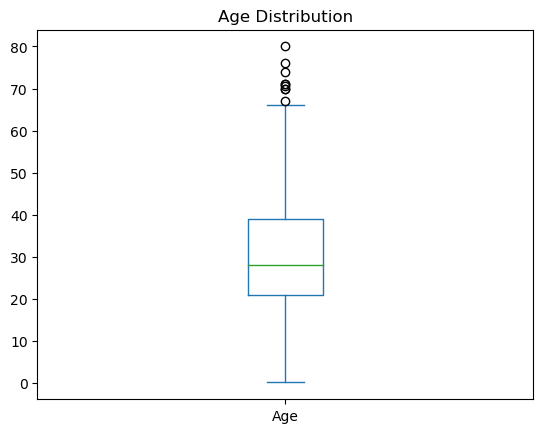

In [18]:
# Viewing the feature using boxplot - 3. Age
plt.title('Age Distribution')
titanic.Age.plot.box()
plt.show()

Based on the box plot, we see that ages span from 0 to 80 years, with a notable concentration of individuals aged between 20 and 40 years. The median age is around 28 years. However, it wouldn't be appropriate to impute missing ages uniformly, as they represent a significant portion of the dataset.

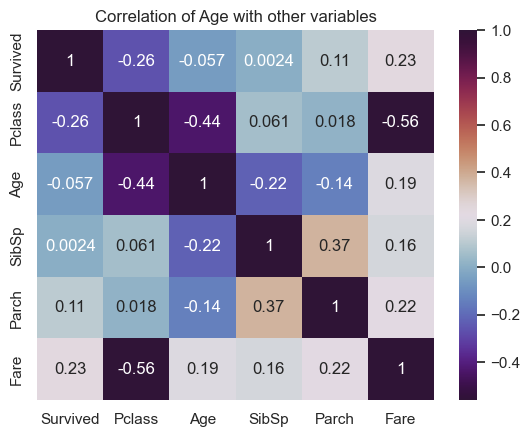

In [40]:
# Visualizing the correlation of Age feature with other variables
plt.title('Correlation of Age with other variables')
sns.heatmap(titanic[['Survived', 'Pclass','Age', 'SibSp','Parch', 'Fare']].corr() , annot = True , cmap = 'twilight_shifted')
plt.show()

The heatmap suggests that Age lacks strong correlations with other features for imputation, whereas P_class shows a notable correlation of -0.41, which is significant for decision-making regarding imputation strategies.

We can extract titles from the feature 'Name' and use their mean values within their 'Pclass' to impute age.

#### 4.2.1 Feature engineering

In [20]:
# Extracting the Title
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.' , expand = False)

# Verify
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [21]:
# Finding the number of missing values for each title
titanic[['Title','Age']][titanic['Age'].isnull()].Title.value_counts()

Title
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: count, dtype: int64

There are two categories, "Miss" and "Ms". Let's standardize them by converting all instances of "Ms" to "Miss" to unify them.

In [22]:
# Unifying Ms and Miss
titanic.Title[titanic.Title == 'Ms'] = 'Miss'

# Finding the mean age of each category based on Pclass and Title
titanic.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])

count       mean
Title    Pclass                  
Capt     1           1  70.000000
Col      1           4  54.000000
Countess 1           1  33.000000
Don      1           1  40.000000
Dona     1           1  39.000000
Dr       1           5  45.600000
         2           2  38.500000
Jonkheer 1           1  38.000000
Lady     1           1  48.000000
Major    1           2  48.500000
Master   1           5   6.984000
         2          11   2.757273
         3          37   6.090000
Miss     1          59  30.338983
         2          49  20.865714
         3         103  17.360874
Mlle     1           2  24.000000
Mme      1           1  24.000000
Mr       1         132  41.450758
         2         137  32.346715
         3         312  28.318910
Mrs      1          67  43.208955
         2          54  33.518519
         3          49  32.326531
Rev      2           8  41.250000
Sir      1           1  49.000000

In [23]:
# Finding the number of missing values for each title
titanic[['Title','Age']][titanic['Age'].isnull()].Title.value_counts()

Title
Mr        176
Miss       51
Mrs        27
Master      8
Dr          1
Name: count, dtype: int64

Let's proceed with imputing values based on the mean values derived from the table above.

In [24]:
# Imputing Age Categories

# 1. Master
titanic[(titanic['Title'] == 'Master') & (titanic.Age.isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,C,Master
1135,1136,0,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,S,Master
1230,1231,0,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,C,Master
1235,1236,0,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,S,Master
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C,Master


Based on the data observed, there is one "Master" traveling alone. Typically, we assume the lone traveler is 14 years old, which is the maximum age considered as a child. Let's impute this age as 14.

All the children belong to Pclass = 3. Let's impute their ages with the mean age for Pclass 3, which is 6.

In [25]:
# Imputing the Age of Master travelling alone
titanic.Age[(titanic['Title'] == 'Master') & (titanic.Age.isna()) & (titanic.SibSp == 0)] = 14

# Imputing the Age of other Masters
titanic.Age[(titanic['Title'] == 'Master') & (titanic.Age.isna())] = 8

In [26]:
# Finding the number of missing values for each title
titanic[['Title','Age']][titanic['Age'].isnull()].Title.value_counts()

Title
Mr      176
Miss     51
Mrs      27
Dr        1
Name: count, dtype: int64

We have four more titles to handle. Let’s write a simple program to automate the imputation.

In [27]:
# Creating a datframe from the groupby output
age_pclass_summary = titanic.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])
age_pclass_summary['mean'] = round(age_pclass_summary['mean'],2)

# Assigning the titles to a list variable
titles = ['Mr' , 'Miss' , 'Mrs' , 'Dr']

# Program to impute missing Age values based on title and Pclass
for x in titles:
    for index,rows in titanic[(titanic['Title'] == x) & (titanic['Age'].isna())].iterrows():
        pclass = titanic.iloc[index]['Pclass']
        titanic.at[index, 'Age'] = age_pclass_summary.loc[x,pclass][1]

In [28]:
# Verifying the missing values list
titanic.isnull().sum()[titanic.isnull().sum()>0]

Series([], dtype: int64)

All the missing values has been handled. 

## 5. Data Preparation

Let's create a new DataFrame containing only the variables that we will use for conducting Exploratory Data Analysis (EDA). This involves selecting and organizing the relevant columns needed for our analysis.

In [29]:
# Creating a new dataframe with varaibles for EDA
titanic_eda = titanic[['Survived', 'Pclass',  'Sex', 'Age', 'SibSp','Parch',  'Fare', 'Embarked']]

We excluded 'PassengerId', 'Name','Title' and 'Ticket' from the Titanic dataset as they do not contribute to the dataset's analysis.

## 6. Exploratory Data Analysis

To explore the relationship among the features.

In [30]:
# Viewing the data
titanic_eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 6.1 Bivariate Analysis

In [31]:
# 1. % of Survivors
print('Survival %')
print('Total :',round(titanic_eda.Survived.sum() * 100/titanic_eda.shape[0] , 2) , '%')
print('Female:',round( titanic_eda[(titanic_eda['Sex'] == 'female') & (titanic_eda.Survived == 1)].shape[0]* 100/titanic_eda.Survived.sum() , 2) , '%')
print('Male  :',round( titanic_eda[(titanic_eda['Sex'] == 'male') & (titanic_eda.Survived == 1)].shape[0]* 100/titanic_eda.Survived.sum() , 2) , '%')


Survival %
Total : 37.74 %
Female: 77.94 %
Male  : 22.06 %


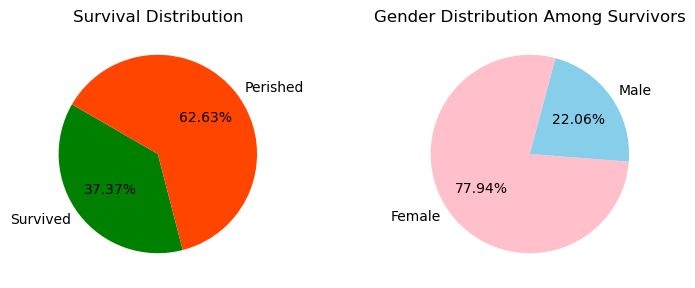

In [32]:
# Plotting the % of Survivors
fig, axes = plt.subplots(1,2,figsize = (8,4))

Survival = {'Survived': 37.74 , 'Perished' : 63.26}
labels= Survival.keys()
values = Survival.values()
axes[0].pie(values, labels = labels, autopct = '%.2f%%', startangle = 150 , colors = ['green' , 'orangered'])
axes[0].set_title('Survival Distribution')

plt.subplots_adjust(wspace=0.5)

Survival = {'Female': 77.94 , 'Male' : 22.06}
labels= Survival.keys()
values = Survival.values()
axes[1].pie(values, labels = labels, autopct = '%.2f%%', startangle = 75 , colors = ['pink' , 'skyblue'])
axes[1].set_title('Gender Distribution Among Survivors')
plt.show()

Among the total number of passengers, the survival rate is only 37%. Of those who survived, 77% are female and 22% are male, largely due to     the **"women and children first"** policy.

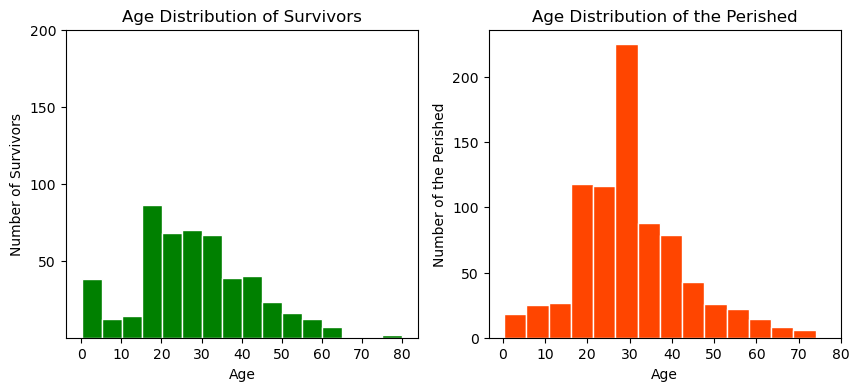

In [33]:
# 2. Plotting the Age distribution among Survivors and the Perished
fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing Age Distribution of Survivors
axes[0].hist(titanic_eda.Age[titanic_eda['Survived']==1] , edgecolor ='white' , bins = 16 , color = 'green')
axes[0].set_title('Age Distribution of Survivors')
axes[0].set_xlabel('Age')
axes[0].set_xticks([0,10,20,30,40,50,60,70,80])
axes[0].set_yticks([50,100,150,200])
axes[0].set_ylabel('Number of Survivors')

# Visualizing Age Distribution of the Perished
axes[1].hist(titanic_eda.Age[titanic_eda['Survived']==0] , edgecolor ='white' , bins = 14 , color = 'orangered')
axes[1].set_title('Age Distribution of the Perished')
axes[1].set_xlabel('Age')
axes[1].set_xticks([0,10,20,30,40,50,60,70, 80])
axes[1].set_ylabel('Number of the Perished')
plt.show()

The charts distinctly illustrates a lower count of survivors. The distribution of ages shows a skew towards younger survivors. Individuals around 30 years old had a higher chance of perishing, evident from the peak in the second histogram.

Factors contributing to this pattern may include the prioritization of women and children in lifeboats and the presence of stronger individuals within the 20-40 age group.

#### 6.2 Multivariate Analysis

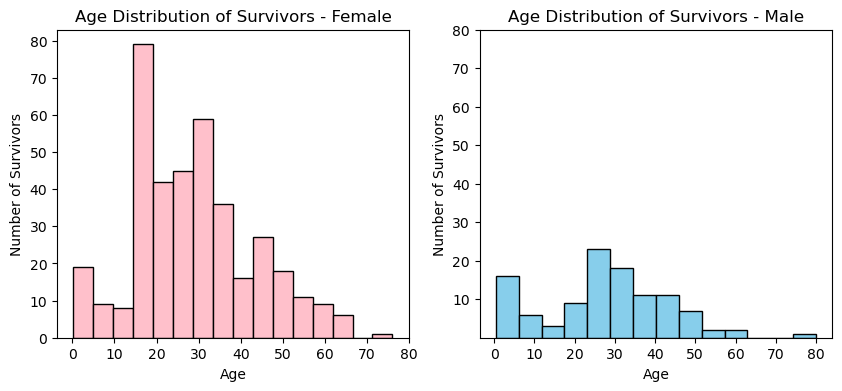

In [34]:
# 2. Visualizing the Age Distribution of Survivors by Gender

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing Age Distribution of Survivors - Female
axes[0].hist(titanic_eda.Age[(titanic_eda['Survived']==1) & (titanic_eda['Sex'] == 'female')] ,\
             edgecolor ='black' , bins = 16 , color = 'pink')
axes[0].set_title('Age Distribution of Survivors - Female')
axes[0].set_xlabel('Age')
axes[0].set_xticks([0,10,20,30,40,50,60,70,80])
axes[0].set_ylabel('Number of Survivors')

# Visualizing Age Distribution of Survivors - Male
axes[1].hist(titanic_eda.Age[(titanic_eda['Survived']==1) & (titanic_eda['Sex'] == 'male')] ,\
             edgecolor ='black' , bins = 14 , color = 'skyblue')
axes[1].set_title('Age Distribution of Survivors - Male')
axes[1].set_xlabel('Age')
axes[1].set_xticks([0,10,20,30,40,50,60,70,80])
axes[1].set_yticks([10,20,30,40,50,60,70,80])
axes[1].set_ylabel('Number of Survivors')
plt.show()

The chart clearly highlights the difference in survival rates between males and females, showing that more females survived.

Women aged 15-20 and 30-35 had the highest survival rates, while those aged 65-80 had the lowest.

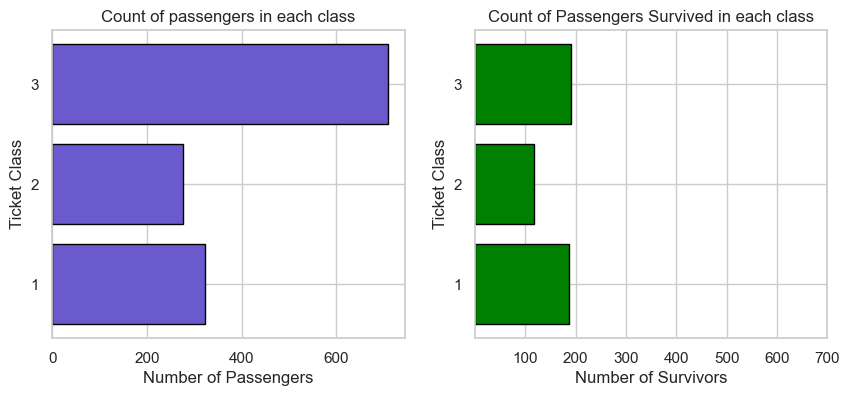

In [35]:
# 3. Visualizing the Survivors from different classes
sns.set_theme(style = 'whitegrid')

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Plotting the count of passengers in each class
pclass_total  = titanic_eda.groupby('Pclass')['Survived'].count()

axes[0].barh(pclass_total.index , pclass_total.values , edgecolor = 'black' , color = 'slateblue')
axes[0].set_title('Count of passengers in each class')
axes[0].set_xlabel('Number of Passengers')
axes[0].set_ylabel('Ticket Class')
axes[0].set_yticks([1 , 2 , 3])

# Plotting the count of passengers survived in each class
pclass_survival  = titanic_eda.groupby('Pclass')['Survived'].sum()

axes[1].barh(pclass_survival.index , pclass_survival.values , edgecolor = 'black' , color = 'green')
axes[1].set_title('Count of Passengers Survived in each class')
axes[1].set_xlabel('Number of Survivors')
axes[1].set_xticks([100 , 200 , 300, 400, 500, 600, 700])
axes[1].set_ylabel('Ticket Class')
axes[1].set_yticks([1 , 2 , 3])

plt.show()


In [36]:
# Calculating the Percentage of Survivors in each class
round(titanic_eda.groupby('Pclass')['Survived'].sum()*100/titanic_eda.groupby('Pclass')['Survived'].count(), 2)

Pclass
1    57.59
2    42.24
3    26.94
Name: Survived, dtype: float64

The data exposes a stark contrast in survival rates among passenger classes aboard the Titanic. First-class passengers experienced significantly higher survival rates compared to those in second and third class. This suggests a potential influence of socioeconomic status on access to lifeboats during the tragic events of the disaster.

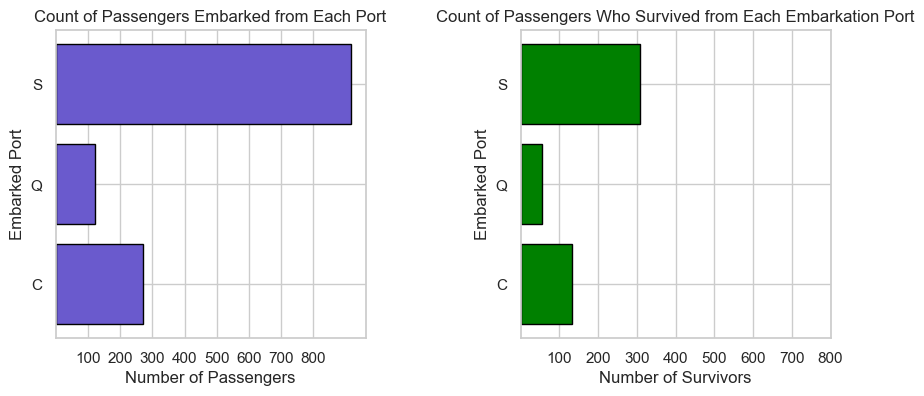

In [37]:
# 4.  Visualizing the Distribution of Survivors by Embarked Port
fig, axes = plt.subplots(1,2,figsize = (10,4))

# Plotting the count of passengers in port
port_total  = titanic_eda.groupby('Embarked')['Survived'].count()

axes[0].barh(port_total.index , port_total.values , edgecolor = 'black' , color = 'slateblue')
axes[0].set_title('Count of Passengers Embarked from Each Port')
axes[0].set_xlabel('Number of Passengers')
axes[0].set_xticks([100 , 200 , 300, 400, 500, 600, 700,800])
axes[0].set_ylabel('Embarked Port')

plt.subplots_adjust(wspace=0.5)
# Plotting the count of passengers survived who embarked from different classes
port_survival  = titanic_eda.groupby('Embarked')['Survived'].sum()

axes[1].barh(port_survival.index , port_survival.values , edgecolor = 'black' , color = 'green')
axes[1].set_title('Count of Passengers Who Survived from Each Embarkation Port')
axes[1].set_xlabel('Number of Survivors')
axes[1].set_xticks([100 , 200 , 300, 400, 500, 600, 700,800])
axes[1].set_ylabel('Embarked Port')

plt.show()

In [38]:
# Calculating the Percentage of Survivors in each class
round(titanic_eda.groupby('Embarked')['Survived'].sum()*100/titanic_eda.groupby('Embarked')['Survived'].count(), 2)

Embarked
C    49.26
Q    43.90
S    33.52
Name: Survived, dtype: float64

The embarked port doesn't directly influence the survival rate. However, from the chart, we can see that the highest number of passengers boarded at **Southampton**, where the journey began, while the lowest number boarded at **Queenstown**, the last port.

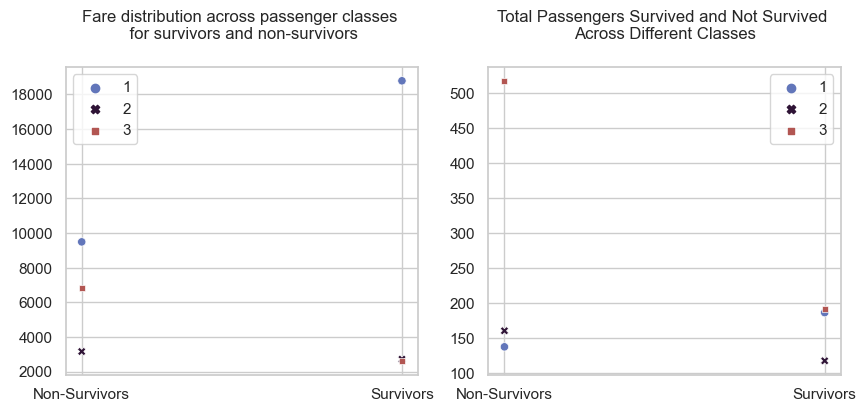

In [39]:
# 5.Visualizing Fare Distribution Among Different Ticket Classes for Survivors and Non-Survivors

fig, axes = plt.subplots(1,2,figsize = (10,4))

# Visualizing fare distribution across different classes
sns.scatterplot( pd.pivot_table(titanic_eda,values = 'Fare', index ='Survived', columns = 'Pclass', \
                                aggfunc = 'sum' ).round(2), ax =axes[0], palette = 'twilight')
axes[0].set_title('Fare distribution across passenger classes \n for survivors and non-survivors' , pad = 20)
axes[0].legend(loc = 'upper left')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Non-Survivors','Survivors'])
axes[0].set_xlabel('')


# Visualizing fare distribution across different classes
sns.scatterplot(pd.pivot_table(titanic_eda, index ='Survived', columns = 'Pclass', aggfunc='size'), palette = 'twilight')
axes[1].set_title('Total Passengers Survived and Not Survived \nAcross Different Classes', pad = 20)
axes[1].legend(loc = 'upper right')

axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Non-Survivors','Survivors'])
axes[1].set_xlabel('')
plt.show()

The chart on the left effectively visualizes the survival status of passengers and the distribution of fare across different classes, while the chart on the right displays the number of passengers who survived or not, categorized by their classes.

From the chart, it's evident that survivors in the first class paid higher fares, despite having a survival count similar to the second class.

The third class shows the lowest fare collection among survivors and non-survivors alike, with fewer survivors overall.